In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

I choose the $\textbf{regrssion model}$ as TermProject.

* So, First, open the Regrssion's csv file. And then, see what is our dependent variable and independent variables.


**I put one code (which is not working) at the below (Evaluating Decision Tree area) on purpose** because I want to show you the memory limitation issue


In [2]:
data = pd.read_csv("Regression_Rossman.csv")
data.head(5)

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,1,5,2015-07-31,5263.0,NaN,1,1,0,1
1,1,2,5,2015-07-31,6064.0,625.0,1,1,0,1
2,2,3,5,2015-07-31,8314.0,821.0,1,1,0,1
3,3,4,5,2015-07-31,13995.0,1498.0,1,1,0,1
4,4,5,5,2015-07-31,4822.0,559.0,1,1,0,1


#### Information of each Features
- ID : unique Stor ID
- Customers : number of customers who visited the store that day
- Open : An indicator varable for whether the store was open or not
- StateHoliday : An indicator variable for whether the store going through a promotion.
- Promo : Indicator variable whether a store is running a promotion on that day
- School Holiday : indicates if the store was affected by the closure of public schools.

#### Main Purpose
* From the independent varialbes, we want to predict the Sales.
* What is the meaningful value of independent value? (how importantly affect the Sales depending on independent variables X)
* How can we handle the non-numeric variables? (how can we transform in order to interpret as regression)
* How can we interpret the result? 

## My first hypothesis
* 1) **Sales** will be very closely relationship with seasonal date (such as **holiday, weekend **) 
 - therefore, in order to analyize this, we have to modify "Date" variable into any specific form that we can handle.
* 2)  **Sales** will also be very closely relationship with number of customers.

* 3)  **Sales** will not have close relationship with "Day of week".

#### (Just option) change the order
* since, $\textbf{(Sales)}$ is our depedent variable $\rightarrow$ I change the order at the rightmost side.

In [3]:
Sales = data.iloc[:,4]
data = data.drop(['Sales'], axis = 1)
data["Sales"] = Sales
data.head(10)

,Unnamed: 0,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,0,1,5,2015-07-31,NaN,1,1,0,1,5263.0
1,1,2,5,2015-07-31,625.0,1,1,0,1,6064.0
2,2,3,5,2015-07-31,821.0,1,1,0,1,8314.0
3,3,4,5,2015-07-31,1498.0,1,1,0,1,13995.0
4,4,5,5,2015-07-31,559.0,1,1,0,1,4822.0
5,5,6,5,2015-07-31,589.0,1,1,0,1,5651.0
6,6,7,5,2015-07-31,1414.0,1,1,0,1,15344.0
7,7,8,5,2015-07-31,833.0,1,1,0,1,8492.0
8,8,9,5,2015-07-31,687.0,1,1,0,1,8565.0
9,9,10,5,2015-07-31,681.0,1,1,0,1,7185.0


* Check simple description of data using `info()` method
  - Column name
  - Column/Row counts
  - Data types
  - Counts of non-null samples

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53738 entries, 0 to 53737
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     53738 non-null  int64  
 1   Store          53738 non-null  int64  
 2   DayOfWeek      53738 non-null  int64  
 3   Date           53738 non-null  object 
 4   Customers      53567 non-null  float64
 5   Open           53738 non-null  int64  
 6   Promo          53738 non-null  int64  
 7   StateHoliday   53738 non-null  object 
 8   SchoolHoliday  53738 non-null  int64  
 9   Sales          53733 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 4.1+ MB


In [5]:
data.shape

(53738, 10)

* As we can see above result, there are some null_values. at $\textbf{Customers } and \textbf{ Sales}$.

In [6]:
data.isnull().sum()

Unnamed: 0         0
Store              0
DayOfWeek          0
Date               0
Customers        171
Open               0
Promo              0
StateHoliday       0
SchoolHoliday      0
Sales              5
dtype: int64

* Only 5 data is missing on Sales data.
* But, 171 data of Customers shows null_data.
- So, **how we can handle this Customers is important as I think.**
 - Two ways
    - (1) just deleting 171 rows
    - (2) using such as mean, median or something, we replace null data into certain point.
    
We will handle later, at the pre-processing part.

### data.describe() and see the histogram
- since, there exist null_data. So, at this point, I just delete immediately (임시적으로), to make the general intuition of each feature.
- If so, we just drop 171 row data.

In [7]:
data_imm = data.dropna()
print(data_imm.shape)

(53562, 10)


In [8]:
data_imm.describe()

,Unnamed: 0,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,Sales
count,53562.000000,53562.000000,53562.000000,53562.000000,53562.000000,53562.000000,53562.000000,53562.000000
mean,26867.554012,29.753426,3.999067,578.373026,0.826145,0.381464,0.176039,5501.139016
std,15509.864484,17.056625,1.998515,366.996563,0.378988,0.485751,0.380857,3442.701887
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13434.250000,15.000000,2.000000,396.250000,1.000000,0.000000,0.000000,3732.250000
50%,26870.500000,30.000000,4.000000,582.000000,1.000000,0.000000,0.000000,5637.000000
75%,40293.750000,44.000000,6.000000,790.000000,1.000000,1.000000,0.000000,7631.000000
max,53737.000000,59.000000,7.000000,2849.000000,1.000000,1.000000,1.000000,38037.000000


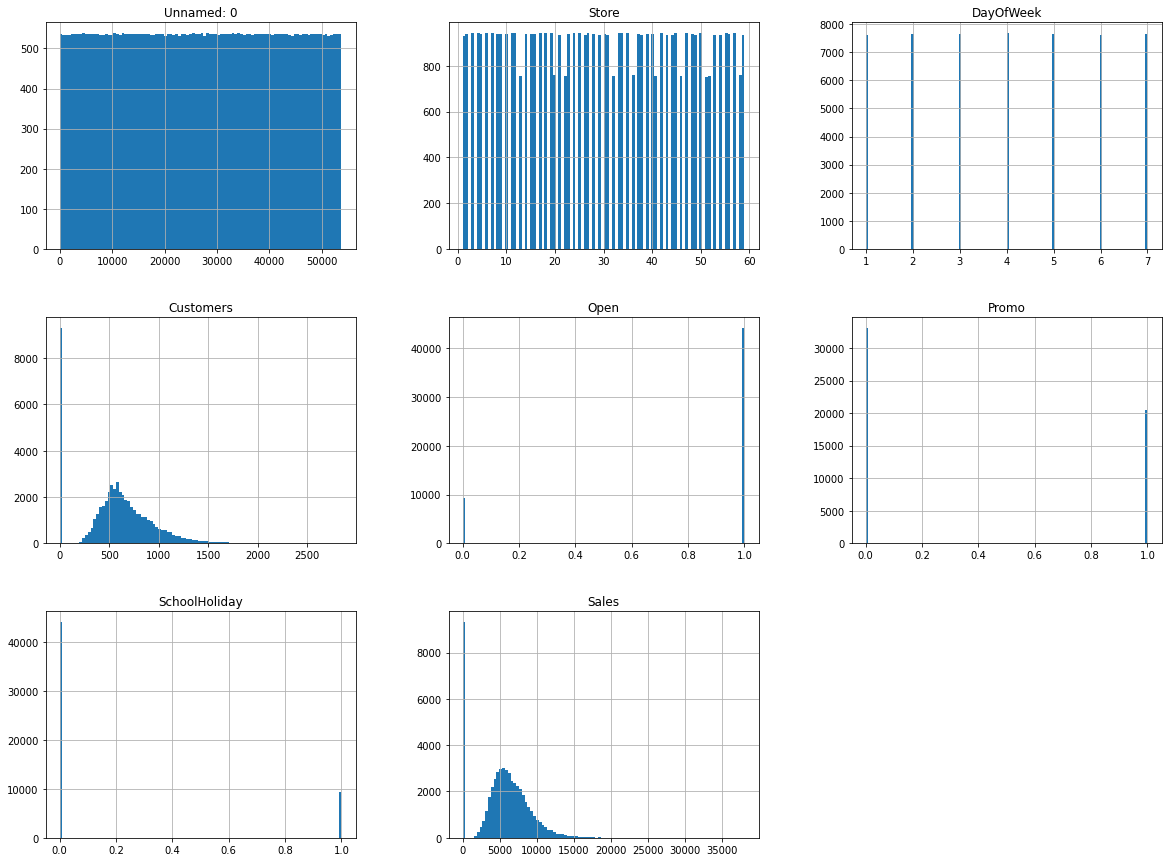

In [9]:
data_imm.hist(bins=100, figsize=(20, 15))
plt.show()

### Intuitions of each features.
- **Unnamed** (located on [3:2]) shows no meaningful data. Since it shows from 0 to 53736. Just # of data.
- **Store** (located on [3:1]) shows  splitting two groups about 750 and 950. (separting into two group)
- **DayofWeek** (located on [1:2]) doesn't show any meaningful. Just balanced.
- **Customer** (located on [1:1]) shows left skewed data. (many data densely located on left side)
- **Open** (located on [1:3]) shows the relationship between open or not. So, Open(=1)'s distribution is much larger.
- **Promo** (located on [2:1]) shows the relationship between Promo or not. Promo(=1) value is somewhat large. So, we have to think about this.
- **Sales** (located on [2:2]) also shows the left skewed data. (many data densely located on left side). Also, Sales(=0) values are quiet large.



##### More detaily describe certain features
- Store
- Date

### Store

Text(0.5, 1.0, '# of transaction at each Store')

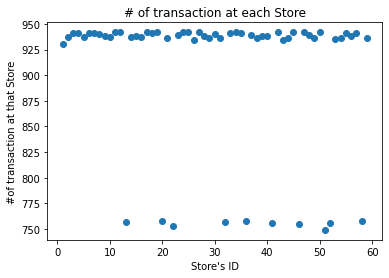

In [10]:
plt.scatter(data_imm["Store"].value_counts().index, data_imm["Store"].value_counts().values)
plt.xlabel("Store's ID")
plt.ylabel("#of transaction at that Store")
plt.title("# of transaction at each Store")

- Stores transaction data is very separable. Because it has very thick gap between (750,925).
- So, I just groupfy to check the ratio between two group.

([<matplotlib.axis.XTick at 0x7f8a095a35b0>,
 [Text(0, 0, '>=850'), Text(1, 0, '<850')])

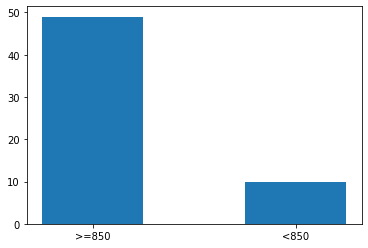

In [11]:
A = data_imm["Store"].value_counts()>800
B = data_imm["Store"].value_counts()<800
A = A.sum()
B = B.sum()
plt.bar([0,1],[A,B], width = 0.5)
plt.xticks([0,1], [">=850","<850"])


### date

In [12]:
data_imm["Date"].value_counts()

2014-04-16    59
2013-12-21    59
2013-12-19    59
2013-12-18    59
2013-12-17    59
              ..
2014-12-02    48
2014-09-22    48
2014-10-08    47
2014-09-16    47
2014-08-02    45
Name: Date, Length: 942, dtype: int64

- #of transaction at that date shows not significantly different. 
- Max = 59, min = 46


#### Let's more detaily dig in to each cases. 

In [13]:
B = []
c = []
for i in range(46,60):
    A = data_imm["Date"].value_counts() == i 
    A.sum()
    B.append(A.sum())
    c.append(i)
    print("%s  :"%i, A.sum())


46  : 0
47  : 2
48  : 17
49  : 164
50  : 0
51  : 0
52  : 0
53  : 0
54  : 0
55  : 0
56  : 1
57  : 16
58  : 116
59  : 625


<BarContainer object of 14 artists>

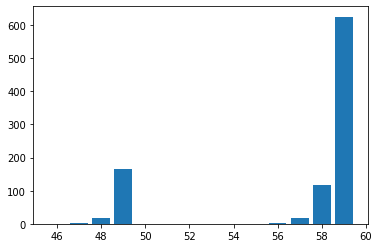

In [14]:
plt.bar(c,B)

- large amount of data are densely located on over than 57 cases.
- Also, like above case of Store, we can also separete into two group.

([<matplotlib.axis.XTick at 0x7f8a095bfd00>,
 [Text(0, 0, '>54'), Text(1, 0, '<54')])

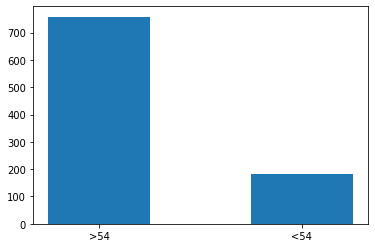

In [15]:
A = data_imm["Date"].value_counts()>54
B = data_imm["Date"].value_counts()<54
A = A.sum()
B = B.sum()
plt.bar([0,1],[A,B], width = 0.5)
plt.xticks([0,1], [">54","<54"])

* This means that ***(#of transaction at certain day)*** is largely located on over than 54.
- The balacned between this ratio is much skewer than *Store*

#### correlation between each sample

Text(0.5, 1.0, 'Correlation')

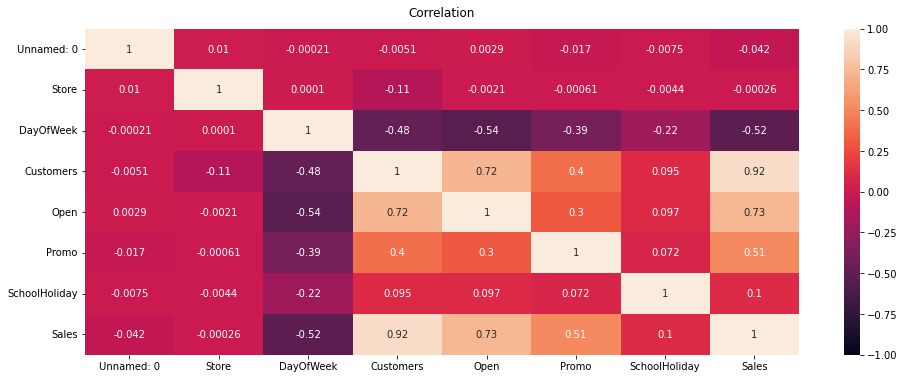

In [16]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)  
heatmap.set_title('Correlation',  pad=12)

In [17]:
data.corr()['Sales'].sort_values(ascending=False)

Sales            1.000000
Customers        0.919535
Open             0.732648
Promo            0.509810
SchoolHoliday    0.101986
Store           -0.000265
Unnamed: 0      -0.041817
DayOfWeek       -0.516496
Name: Sales, dtype: float64

##### meaning
- I doesn't do the pre-processing such as $\textbf{(DayofWeek,SchoolHoliay, Store) ...etc}$.
- So, this doesn't guarantee the signiicant result.
- But **customers & Sales** relation shows very high affected each other.
- Also, ***Sales & Promo or Sales & Open*** shows somewhat relation between each other.
  - I think that, even thought it is not numeric, just nominal data, 0 means nothing, 1 means meaningful data. 

## Split training and test data

- Remember, you **MUST** split test data first for simulating unseen data
- Use `train_test_split()` method in scikit-learn package
- If you use test set on training your models, it underestimates generalization error, which induces __data snooping bias__.

* setting random state = 0
* test ratio = 0.2 $\rightarrow$ test: train = (0.2 : 0.8)

In [18]:
# import method
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split( data.iloc[:,:-1],data.iloc[:,-1], test_size=0.2, random_state=0)

- check whether, train and test is well defined 

In [19]:
lenx_train = len(x_train)
leny_train = len(y_train)
lenx_test  = len(x_test)
leny_test = len(y_test)

print(f'Original total data number:', len(data))
print()
print(f'Training samples: {lenx_train}, Test samples: {leny_train}')
print(f'Training samples: {lenx_test}, Test samples: {leny_test}')

Original total data number: 53738

Training samples: 42990, Test samples: 42990
Training samples: 10748, Test samples: 10748


  - we check that we separate **x_train, y_train, x_test, y_test well**.


* Then, From the x_train data, we dig in Exploratory data analysis in order to get some intuition of this problem.

## Exploratory Data Analysis (EDA)

#### before we do,

The reason why we do EDA at this step is, we should first divide into **train_data and test_data**.
- we just focus on x_train data at EDA step.
- we plot many kinds of chart to see the relationship
- at this step, there can be some modifying step. (make new independent varible that is mixed with original independent variables)
  - So, to maintain original data, we copy the training data at first.
    - if modified new variable show good performance, then we modifed also into x_train, x_test sample.

In [20]:
Train, Test = train_test_split( data, test_size=0.2, random_state=0)
Train_EDA = Train.copy().dropna()
Test_EDA = Test.copy().dropna()


- to analyze, first we drop the NaN values. with using dropna()

### 1st) Sales with Customers

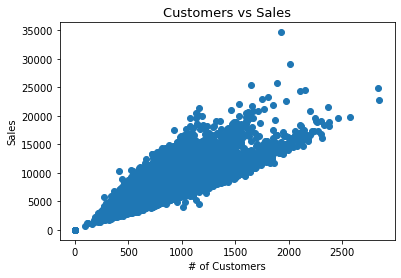

In [21]:
plt.scatter( x = Train_EDA["Customers"], y = Train_EDA["Sales"])
plt.xlabel("# of Customers")
plt.ylabel("Sales")
plt.title("Customers vs Sales", fontsize = 13 )
plt.show()

- With , linear regression graph

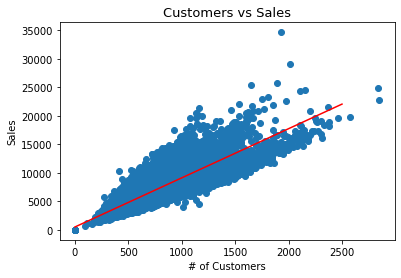

In [22]:
X = Train_EDA["Customers"].values.reshape(-1,1)
y = Train_EDA["Sales"].values.reshape(-1,1)
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)
x = np.arange(0,3000, 500)
y = float(model.intercept_) + x*float(model.coef_)
plt.plot(x,y, 'r')
plt.scatter( x = Train_EDA["Customers"], y = Train_EDA["Sales"])
plt.xlabel("# of Customers")
plt.ylabel("Sales")
plt.title("Customers vs Sales", fontsize = 13 )
plt.show()

- Even though, scatter points shows thick shape, we can generally say **it has positive relationship between Customers & Sales.**
 - That is, the more customers, the larger Sales.

### 2nd step) Sales & Open

In [23]:
Train_EDA[Train_EDA["Open"]==0]

,Unnamed: 0,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
38149,38149,47,7,2013-09-22,0.0,0,0,0,0,0.0
1589,1589,56,7,2015-07-05,0.0,0,0,0,0,0.0
44313,44313,16,7,2013-06-09,0.0,0,0,0,0,0.0
17480,17480,27,7,2014-09-21,0.0,0,0,0,0,0.0
46129,46129,3,4,2013-05-09,0.0,0,0,a,0,0.0
...,...,...,...,...,...,...,...,...,...,...
51374,51374,56,7,2013-02-10,0.0,0,0,0,0,0.0
43095,43095,37,7,2013-06-30,0.0,0,0,0,0,0.0
48600,48600,55,5,2013-03-29,0.0,0,1,b,1,0.0
15430,15430,37,7,2014-11-02,0.0,0,0,0,0,0.0


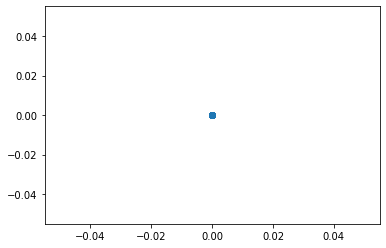

In [24]:
plt.scatter(Train_EDA[Train_EDA["Open"] ==0]["Open"], y = Train_EDA[Train_EDA["Open"] ==0]["Sales"])

- Of course, if the store is closed, **Sales = 0.**


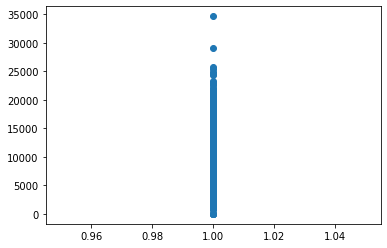

In [25]:
plt.scatter(Train_EDA[Train_EDA["Open"] ==1]["Open"], y = Train_EDA[Train_EDA["Open"] ==1]["Sales"])

- Of course, we cannot analyze only with **Sales & (Open ==1)**

<AxesSubplot:>

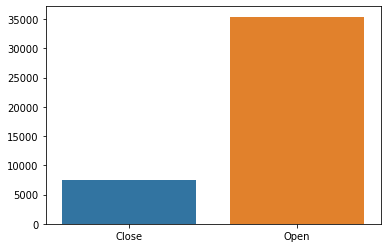

In [26]:
A = ["Close", "Open"]
B = [Train_EDA[Train_EDA["Open"]==0].shape[0],Train_EDA[Train_EDA["Open"]==1].shape[0]]
sns.barplot(x = A, y = B,)
#plt.barh(y= A, width = B)

- This is the ratio between Close & Open.
 - The ratio is about **Close : Open = 1:5** 

#### Conclusion on Sales & Open
- Close (Open ==0) shows very strict prediction value. If Open =0 , then Sales must be 0.
- But, in case of (Open =1) Case, we cannot predict Sales. Because, all of the independent variable (Open) is 1, while dependent variable Sales is varied.

In [27]:
data

,Unnamed: 0,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,0,1,5,2015-07-31,NaN,1,1,0,1,5263.0
1,1,2,5,2015-07-31,625.0,1,1,0,1,6064.0
2,2,3,5,2015-07-31,821.0,1,1,0,1,8314.0
3,3,4,5,2015-07-31,1498.0,1,1,0,1,13995.0
4,4,5,5,2015-07-31,559.0,1,1,0,1,4822.0
...,...,...,...,...,...,...,...,...,...,...
53733,53733,55,2,2013-01-01,0.0,0,0,a,1,0.0
53734,53734,56,2,2013-01-01,0.0,0,0,a,1,0.0
53735,53735,57,2,2013-01-01,0.0,0,0,a,1,0.0
53736,53736,58,2,2013-01-01,0.0,0,0,a,1,0.0


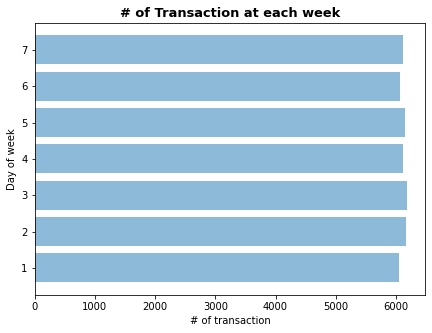

In [28]:
A = []
B = []
for i in range(1,8):
    A.append(Train_EDA[Train_EDA["DayOfWeek"]==i].shape[0])
    B.append(i)
    
plt.figure(figsize = (7,5))

plt.barh(B, A, alpha=0.5,)

plt.xlabel('# of transaction')
plt.ylabel("Day of week")
plt.title('# of Transaction at each week' , fontsize = 13, fontweight='bold')

plt.show()



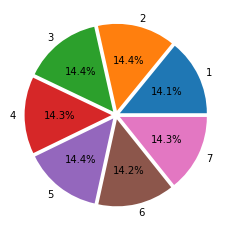

In [29]:
plt.pie(A, labels=B, autopct='%.1f%%', explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05])
plt.show()

- #of transaction at "Day of week" doesn't show significant different values.

- Then, how about, Sales between DayofWeek?

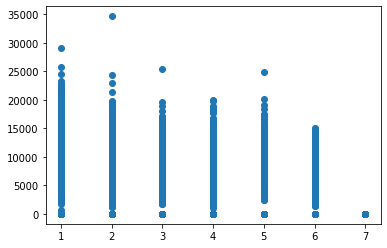

In [30]:
plt.scatter(x = Train_EDA["DayOfWeek"], y = Train_EDA["Sales"])

In [31]:
A = []
for i in range(1,8):
    A.append(Train_EDA[Train_EDA["DayOfWeek"] ==i]['Sales'])

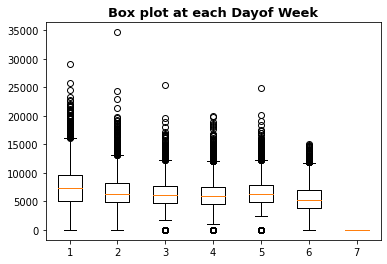

In [32]:
plt.boxplot(A)
plt.title("Box plot at each Dayof Week",  fontsize = 13, fontweight='bold')
plt.show()

In [33]:
Train_EDA[Train_EDA["DayOfWeek"] ==7]["Open"].value_counts()


0    6116
Name: Open, dtype: int64

#### Conclusion
- At each Day of week, it shows very similiar shape. That is, It seems no difference depending on Day of week.
- Week 7 shows only 0 Sales values. Because, On Week 7, The Store doesn't open at all. (only 6116 for closing value)

### 4rd step) Sales & StateHoliday

In [34]:
list(set(Train["StateHoliday"]))

['0', 'b', 'a', 'c']

In [35]:
t = ['0','a','b','c']

<BarContainer object of 4 artists>

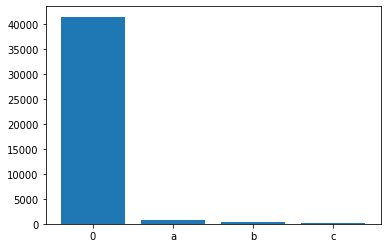

In [36]:
plt.bar(x = t, height =  Train_EDA["StateHoliday"].value_counts())

- There seems '0' values (=None) is largely located. 
- left ones (public (=a), Easter (=b), Christmas(=c) ) are similar. 
- Then, link with mean Sales.

In [37]:
Train_EDA[Train_EDA["StateHoliday"]== 'b']["Open"].value_counts()

0    282
Name: Open, dtype: int64

Text(0, 0.5, 'Sales')

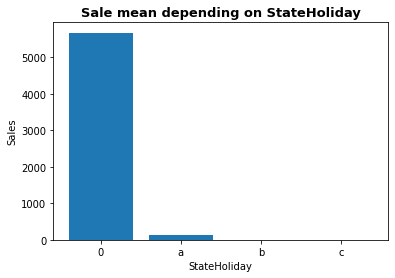

In [38]:
A = ['0','a','b','c']
B = []
for i in A:
    B.append(Train_EDA[Train_EDA["StateHoliday"]== i]["Sales"].mean())
    

plt.bar(x = A, height = B)
plt.title("Sale mean depending on StateHoliday", fontsize = 13, fontweight='bold')
plt.xlabel("StateHoliday")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

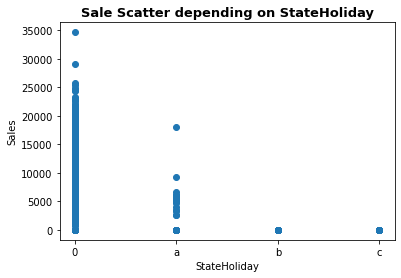

In [39]:
plt.scatter(x= Train_EDA["StateHoliday"], y = Train_EDA["Sales"])
plt.title("Sale Scatter depending on StateHoliday",fontsize = 13, fontweight='bold' )
plt.xlabel("StateHoliday")
plt.ylabel("Sales")

#### conclusion
- First of all, type (b & c) doesn't have any Sales value. (only 0) 
 - Because, on Easter & christmas, The Store doesn't open. (All of the Open value = 0)
- 
- **So we have to compare between '0' and 'a'**
- **'0'(none) value**
 - shows much larger mean value than 'a'
 - Also, when we see scatter plot, its scatter point located much larger than 'a'.
 
 **'a'(public) value**
 - shows much lower mean value than 'a'
 - Also, when we see scatter plot, its scatter point located much lower than 'a'.

Text(0.5, 0, 'Mean Sales')

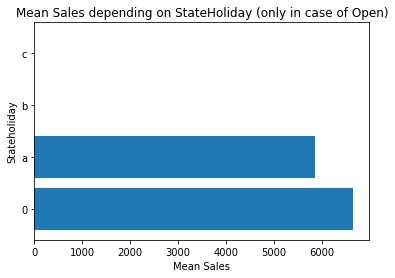

In [40]:
B = Train_EDA[Train_EDA["StateHoliday"]=='a']
B = B[B["Open"]==1].Sales.mean()
A = Train_EDA[Train_EDA["StateHoliday"]=='0']
A = A[A["Open"]==1].Sales.mean()
C = [A,B,0,0]
E = ['0','a','b','c']

plt.barh(y = E, width = C)
plt.title("Mean Sales depending on StateHoliday (only in case of Open)")
plt.ylabel("Stateholiday")
plt.xlabel("Mean Sales")

**cf) just considering open case**
- if we just consider Open case,
- 'a' and '0' 's mean value is very similiar each other.
- about 5700 and 6300. 
- That is, if we just consider Mean value in case of Open
 - Their difference shows not much different.
 - Of course, '0' case is larger.


### 5rd step) Sales & Promo

In [41]:
A= Train_EDA[Train_EDA["Promo"]==0]

a = [A["Open"].value_counts()[0], A["Open"].value_counts()[1]]

B = Train_EDA[Train_EDA["Promo"]==1]
b = [B["Open"].value_counts()[0], B["Open"].value_counts()[1]]
c = list(set(Train_EDA["Promo"]))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


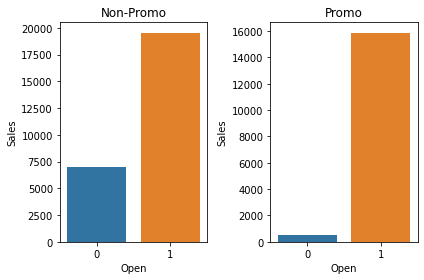

In [42]:
ax1 = plt.subplot(121)
graph1 = sns.barplot(c,a)
plt.xlabel("Open")
plt.ylabel("Sales")
plt.title("Non-Promo")

ax2 = plt.subplot(122)
graph2 = sns.barplot(c,b)
plt.xlabel("Open")
plt.ylabel("Sales")
plt.title("Promo")

plt.tight_layout()
plt.show()

- If there exists a promo, The store have high probability to open their store. 
 - It means that if promo exists, The store have some Sales value.
 
- Then, **compare with Sales**.
 - Compare with Non-promo & Promo without considering Close
 - Compare with Non-Promo & Promo only with Opening case (because, when closed, there is no Sales)

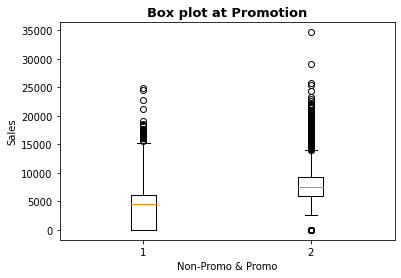

In [43]:
a = [A["Sales"], B["Sales"]]

plt.boxplot(a)
plt.title("Box plot at Promotion",  fontsize = 13, fontweight='bold')
plt.xlabel("Non-Promo & Promo")
plt.ylabel("Sales")
plt.show()

ValueError: X must have 2 or fewer dimensions

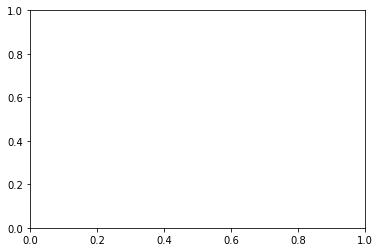

In [45]:
b = [A[A["Open"] ==1]["Sales"], [B[B["Open"] ==1]["Sales"]]]

plt.boxplot(b)
plt.title("Box plot at promotion",  fontsize = 13, fontweight='bold')
plt.xlabel("Non-Promo & Promo")
plt.ylabel("Sales")
plt.show()

#### Conclusion
- Promo season shows much larger Sales than Non-Promo
 - 7700 (Promo) vs 4700(Non-Promo)
- Not that much difference between two cases
 - Especially, Promo case, doesn't affect with close case
  - Reason is Promo's close case is very low
  - other case, Non-Promo's close case is somewhat larger, So, it is affected.

### 6rd step) Sales & data (Last One)

Text(0.5, 1.0, 'Transcation number per Year')

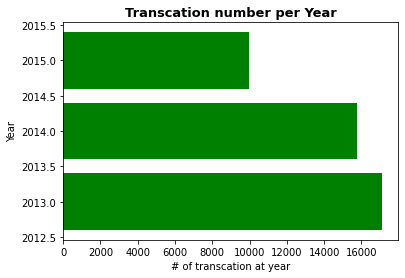

In [46]:
# year by year
d_2013 = Train_EDA[Train_EDA["Date"].str.contains("2013")]
d_2014 = Train_EDA[Train_EDA["Date"].str.contains("2014")]
d_2015 = Train_EDA[Train_EDA["Date"].str.contains("2015")]

A = [len(d_2013), len(d_2014), len(d_2015)]
B = [2013,2014,2015]
plt.barh(y = B, width = A, color = 'g', height = 0.8)
plt.xlabel("# of transcation at year")
plt.ylabel("Year")
plt.title("Transcation number per Year", fontsize = 13, fontweight='bold')

- When we first look at this graph, It seems lie Year on 2015 has very fewer. 
- Or, when the time pass on, the number of Transaction is lower.
- But, '2015' only have until July data.
- So, if we use mean of each '2013' and '2014' data. Then edited graph will be followed

Text(0.5, 1.0, 'Adusted version')

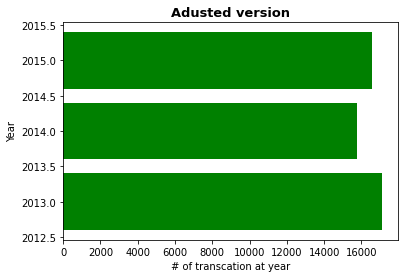

In [47]:
# here is considering 2015's 7~12 month data using mean value of 2013 and 2014
a = ['08','09','10','11','12']
b = 0
for i in a:
    b += len(Train_EDA[Train_EDA["Date"].str.contains('2013-%s'%i)])
    b += len(Train_EDA[Train_EDA["Date"].str.contains('2014-%s'%i)])
b = b/2

A = [len(d_2013), len(d_2014), len(d_2015)+b]
B = [2013,2014,2015]
plt.barh(y = B, width = A, color = 'g', height = 0.8)
plt.xlabel("# of transcation at year")
plt.ylabel("Year")
plt.title("Adusted version", fontsize = 13, fontweight='bold')

- So, we cannot declar that year data have some meaningful insight.
- How about month data? (**day by day is very hard to analyze**)
 - Change object type into int64 type
 - how can I solve the issue when we deal with December to January (ex) 201312 -> 201401)
   - gap is not 1 , but 79
   - just making from starting 201301 at 1, and then increase by 1.
   - ex) 201312  => 12, 201401 => 13 
  

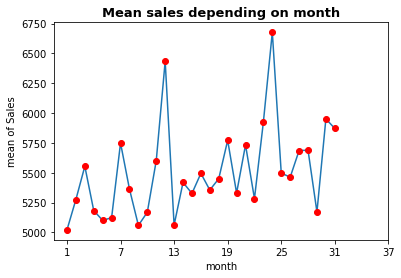

In [48]:
A = Train_EDA.copy()
A["Date"] = A["Date"].str.replace("-", "")

a = ["2013", "2014", "2015"]
b = ["01","02","03", "04","05","06","07","08","09","10","11","12"]
c = []
d = []
e = 0
for i in a:
    for j in b:
        c.append(A[A["Date"].str.contains(i+j)].Sales.mean())
        e += 1
        d.append(e)
            
plt.plot(d,c)
plt.plot(d,c, "ro")
plt.xlabel("month")
plt.ylabel("mean of Sales")
plt.title("Mean sales depending on month", fontsize = 13, fontweight='bold')
plt.xticks([1, 7, 13, 19, 25,31,37])
plt.show()

- It shows that depending on month, the graph very swing a lot.
- Especially on December, it has much higher Sales value.
- Also, On January, it decreased huge amount.
- 
- Also, 2015 has no data from 8th month. So hard to predict.

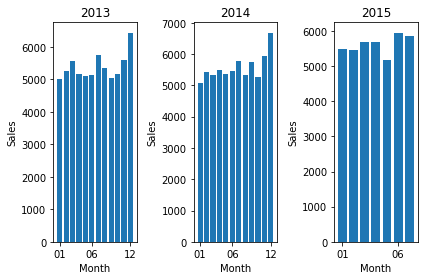

In [49]:
z = []
x = []
c = []
for j in b:
    z.append(A[A["Date"].str.contains('2013'+j)].Sales.mean())
    x.append(A[A["Date"].str.contains('2014'+j)].Sales.mean())
    c.append(A[A["Date"].str.contains('2015'+j)].Sales.mean())


ax1 = plt.subplot(131)
graph1 = plt.bar(b,z)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(["01", "06","12"])
plt.title("2013")

ax2 = plt.subplot(132)
graph2 = plt.bar(b,x)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(["01", "06","12"])
plt.title("2014")

ax3 = plt.subplot(133)
graph2 = plt.bar(b,c)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(["01", "06"])
plt.title("2015")

plt.tight_layout()
plt.show()

- with viewing subplot,
 - depending on month shows similiar
 - Also, on 2015, the mean Sales value seems higher certain degree.
    - So, 2015's next transaction will be much higher than others.

## Data Pre-processing

As I mentioned before, there is a **null** data, (missing data). 
- **Customers = 171**, **Sales = 5**
- we have to handle this one to get more good data.
- I will compare each of them, and check the accuracy.
- 

**I do several ways of pre-processing in order to compare with each other.** such that
  - how about replacing into certain values (mean value or mode, weighted value)?
  - how about just drop that row data and then analyze just having all independent and dependent dataset?

In [50]:
## 1's approach, just drop all of the null data.
data_1st = data.dropna()

- 1st approach) just drop

In [51]:
X = Train_EDA["Customers"].values.reshape(-1,1)
y = Train_EDA["Sales"].values.reshape(-1,1)
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [52]:
## 2nd approach, drop only  Customers & deal with missing value on Sales
data_2nd = data.copy()
null_Customers = data_2nd[data_2nd["Customers"].isnull() ==True]["Customers"].index
data_2nd = data_2nd.drop(axis = 0 , index = null_Customers)
data_2nd ["Date"] =data_2nd["Date"].str.replace("-", "")
data_2nd = data_2nd.reset_index(drop = True)

index = list(data_2nd[data_2nd["Sales"].isnull() ==True].index)
Customers = list(data_2nd[data_2nd["Sales"].isnull() ==True]["Customers"])

mean = []    
for i in Customers:
     mean.append(int(float(model.intercept_) + i*float(model.coef_)))
for i in range(len(index)):
    z = index[i]
    x = mean[i]
    data_2nd.iloc[z,-1] = x



- 2nd approach) 
  - drop customers
  - data which has no Sales value will have some positive Sales value, because data["Open"] ==1
  - I just replace each data, into that certain Customer's mean value.
  - Using linear regression model
     

In [53]:
## 3rd approach, guess and replace the missing values on Customers & Sales & Open
# replace Sales
data_3rd = data.copy()
data_3rd = data_3rd.reset_index(drop = True)    
data_3rd ["Date"] =data_3rd["Date"].str.replace("-", "")
index = list(data_3rd[data_3rd["Sales"].isnull() ==True].index)
Customers = list(data_3rd[data_3rd["Sales"].isnull() ==True]["Customers"])

mean = []    
for i in Customers:
     mean.append(int(float(model.intercept_) + i*float(model.coef_)))
for i in range(len(index)):
    z = index[i]
    x = mean[i]
    data_3rd.iloc[z,-1] = x


# replace Customers with considering Promo & month
S = data_3rd[data_3rd["Open"] ==1]
A = S[S["Promo"] ==True]
B = S[S["Promo"] == False]


index = list(A[A["Customers"].isnull() ==True].index)
month = list(A[A["Customers"].isnull() ==True]["Date"])
for i in range(len(month)):
    month[i] = month[i][:6]  
    
mean = []    
for i in month:
    mean.append(round(A[A["Date"].str.contains(i)].Sales.mean()))
for i in range(len(index)):
    z = index[i]
    x = mean[i]
    data_3rd.iloc[z,4] = x

        
B[B["Sales"].isnull() ==True]
index = list(B[B["Customers"].isnull() ==True].index)
month = list(B[B["Customers"].isnull() ==True]["Date"])
for i in range(len(month)):
    month[i] = month[i][:6]  
    
mean = []    
for i in month:
    mean.append(round(B[B["Date"].str.contains(i)].Sales.mean()))
for i in range(len(index)):
    z = index[i]
    x = mean[i]
    data_3rd.iloc[z,4] = x

- 3rd approach) 
  - data which has no Customer value will have some positive value, because data["Open] ==1 
    - So, I just replace with 2 independent variables. (Promo & month's mean)
     - i) No promo 's month mean Customer
     - ii) Yes promo 's month mean Customer

  - data which has no Sales value will have some positive Sales value, because data["Open"] ==1
  - I just replace each data, into that certain month's mean value.
     - ex) if data = 201305 => I use 201305's mean Sale value.

**Drop duplication**

In [54]:
data_1st = data_1st.drop_duplicates()
data_2nd = data_2nd.drop_duplicates()
data_3rd = data_3rd.drop_duplicates()

**Drop unecessary independent variables**
 - **Unnamed** :0 has no information, but only means that #of data
 - Store:  can have certain information, but this is not numerical meaning. (**have to convert**)
 - DayofWeek : can have certain information, but this is not numerical meaning (**have to convert**)
 - Date : calander have to be changed. (**have to convert**)
 - StateHoliday : can have certain information, but this is not numerical meaning (**have to convert**)
 - **SchoolHoliday** : doesn't have a meaning result. So, Promo & StateHoliday is enough.

In [55]:
data_1st = data_1st.drop(["Unnamed: 0","SchoolHoliday"], axis = 1)
data_2nd = data_2nd.drop(["Unnamed: 0","SchoolHoliday"], axis = 1)
data_3rd = data_3rd.drop(["Unnamed: 0","SchoolHoliday"], axis = 1)

**Encode cateogrical feature**
- Convert categorical features into numerical representation (Store, DayOfWeek, Promo, StateHoliday, SchoolHoliday)
- Using one-hot encoding
 - Before we do, Date have yyyy-mm-dd data.
   - So, this is too large to use one-hot.
   - I just trim the day and use only yyyy-mm. 
   - Then, we only have 201301 ~ 201507 (total 38 categorical data)

In [56]:
data_1st["Date"] =data_1st["Date"].str.replace("-", "").astype("int64")
data_1st["Date"] = data_1st["Date"]//100

data_2nd["Date"] =data_2nd["Date"].str.replace("-", "").astype("int64")
data_2nd["Date"] = data_2nd["Date"]//100

data_3rd["Date"] =data_3rd["Date"].str.replace("-", "").astype("int64")
data_3rd["Date"] = data_3rd["Date"]//100

In [57]:
data_3rd.head(5)

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,Sales
0,1,5,201507,7830.0,1,1,0,5263.0
1,2,5,201507,625.0,1,1,0,6064.0
2,3,5,201507,821.0,1,1,0,8314.0
3,4,5,201507,1498.0,1,1,0,13995.0
4,5,5,201507,559.0,1,1,0,4822.0


- We can see that Date is changed into "int64" with only year & month
- Then, we just divide into categorical and num
  - And then, using one-hot encoding

In [58]:
# let us first separate numerical and categorical columns
cat_feat = ['Store', "DayOfWeek", "Date","Promo","StateHoliday"]
num_feat = ['Customers', 'Open']

# divide into dependent variable and independent variables

X1, y1 = data_1st.iloc[:,:-1], data_1st.iloc[:,-1]
X2, y2 = data_2nd.iloc[:,:-1], data_2nd.iloc[:,-1]
X3, y3 = data_3rd.iloc[:,:-1], data_3rd.iloc[:,-1]


**Using One-hot encoding** (on Cat-feat)

- **After do the data processing, I will divide the Test and Train again**

In [59]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

## X1_train One-hot encoding and concatenate
encoder.fit(data_1st['Store'].values.reshape(-1, 1))
X1_cat1 = encoder.transform(data_1st['Store'].values.reshape(-1, 1))
encoder.fit(data_1st['DayOfWeek'].values.reshape(-1, 1))
X1_cat2 = encoder.transform(data_1st['DayOfWeek'].values.reshape(-1, 1))
encoder.fit(data_1st['Date'].values.reshape(-1, 1))
X1_cat3 = encoder.transform(data_1st['Date'].values.reshape(-1, 1))
encoder.fit(data_1st['Promo'].values.reshape(-1, 1))
X1_cat4 = encoder.transform(data_1st['Promo'].values.reshape(-1, 1))
encoder.fit(data_1st['StateHoliday'].values.reshape(-1, 1))
X1_cat5 = encoder.transform(data_1st['StateHoliday'].values.reshape(-1, 1))
X1_cat = np.concatenate([X1_cat1, X1_cat2, X1_cat3, X1_cat4, X1_cat5], axis=1)

## X2_train One-hot encoding and concatenate
encoder.fit(data_2nd['Store'].values.reshape(-1, 1))
X2_cat1 = encoder.transform(data_2nd['Store'].values.reshape(-1, 1))
encoder.fit(data_2nd['DayOfWeek'].values.reshape(-1, 1))
X2_cat2 = encoder.transform(data_2nd['DayOfWeek'].values.reshape(-1, 1))
encoder.fit(data_2nd['Date'].values.reshape(-1, 1))
X2_cat3 = encoder.transform(data_2nd['Date'].values.reshape(-1, 1))
encoder.fit(data_2nd['Promo'].values.reshape(-1, 1))
X2_cat4 = encoder.transform(data_2nd['Promo'].values.reshape(-1, 1))
encoder.fit(data_2nd['StateHoliday'].values.reshape(-1, 1))
X2_cat5 = encoder.transform(data_2nd['StateHoliday'].values.reshape(-1, 1))
X2_cat = np.concatenate([X2_cat1, X2_cat2, X2_cat3, X2_cat4, X2_cat5], axis=1)

## X3_train One-hot encoding and concatenate
encoder.fit(data_3rd['Store'].values.reshape(-1, 1))
X3_cat1 = encoder.transform(data_3rd['Store'].values.reshape(-1, 1))
encoder.fit(data_3rd['DayOfWeek'].values.reshape(-1, 1))
X3_cat2 = encoder.transform(data_3rd['DayOfWeek'].values.reshape(-1, 1))
encoder.fit(data_3rd['Date'].values.reshape(-1, 1))
X3_cat3 = encoder.transform(data_3rd['Date'].values.reshape(-1, 1))
encoder.fit(data_3rd['Promo'].values.reshape(-1, 1))
X3_cat4 = encoder.transform(data_3rd['Promo'].values.reshape(-1, 1))
encoder.fit(data_3rd['StateHoliday'].values.reshape(-1, 1))
X3_cat5 = encoder.transform(data_3rd['StateHoliday'].values.reshape(-1, 1))
X3_cat = np.concatenate([X3_cat1, X3_cat2, X3_cat3, X3_cat4, X3_cat5], axis=1)

In [60]:
X1_cat

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

Using **One-hot Encoding** and concatenate all of the values.

##### Scale numerical features
- Scale numerical features to have mean 0 and standard deviation 1
- Use `StandardScaler` provided by Scikit-Learn package
- Select numerical feature columns and call `fit_trnasform()` method
- This is why, we have to reduce the skewed size issue.
- we will use the **sklearn.preprocessing , StandardScaler**

In [61]:
from sklearn.preprocessing import StandardScaler

scalar1 = StandardScaler()
scalar1.fit(X1[num_feat].values)
X1_num = scalar1.transform(X1[num_feat].values)

scalar2 = StandardScaler()
scalar2.fit(X2[num_feat].values)
X2_num = scalar2.transform(X2[num_feat].values)

scalar3 = StandardScaler()
scalar3.fit(X3[num_feat].values)
X3_num = scalar3.transform(X3[num_feat].values)

##### Finish up data pre-processing


In [62]:
X11 = np.concatenate([X1_num, X1_cat], axis=1)
X22 = np.concatenate([X2_num, X2_cat], axis=1)
X33 = np.concatenate([X3_num, X3_cat], axis=1)

print("X1's shape : ", X11.shape)
print("X2's shape : ", X22.shape)
print("X3's shape : ", X33.shape)

X1's shape :  (53562, 105)
X2's shape :  (53567, 105)
X3's shape :  (53738, 105)


- Divide Test, Train set again.
  - Because, I frequently re-design our data.
  - Also, It might have the same data split form. ([previous Train data & Test data] and [This Train & Test data] will be same)
  - Of course, It is fine with two ways of processing procedure
    - First split , Second preprocessing
    - First Preprocessing, Second Split

In [63]:
#Separate data_1st
X1_train,X1_test = train_test_split( X11, test_size=0.2, random_state=0)
y1_train,y1_test = train_test_split( y1, test_size=0.2, random_state=0)

#Separate data_2nd

X2_train,X2_test = train_test_split( X22, test_size=0.2, random_state=0)
y2_train,y2_test = train_test_split( y2, test_size=0.2, random_state=0)

#Separate data_3rd
X3_train,X3_test = train_test_split( X33, test_size=0.2, random_state=0)
y3_train,y3_test = train_test_split( y3, test_size=0.2, random_state=0)

print("X1_train's number : ", len(X1_train))
print("X1_test's number  : ",len( X1_test))
print("y1_train's number : ", len(y1_train))
print("y1_test's number  : ",len( y1_test))
print()
print("X2_train's number : ", len(X2_train))
print("X2_test's number  : ",len( X2_test))
print("y2_train's number : ", len(y2_train))
print("y2_test's number  : ",len( y2_test))
print()
print("X3_train's number : ", len(X3_train))
print("X3_test's number  : ",len( X3_test))
print("y3_train's number : ", len(y3_train))
print("y3_test's number  : ",len( y3_test))

X1_train's number :  42849
X1_test's number  :  10713
y1_train's number :  42849
y1_test's number  :  10713

X2_train's number :  42853
X2_test's number  :  10714
y2_train's number :  42853
y2_test's number  :  10714

X3_train's number :  42990
X3_test's number  :  10748
y3_train's number :  42990
y3_test's number  :  10748


## Model training and evaluation

### Model training and evaluation
* Train model
* Evaluate model

Three types of checking my model
 - i) **Linear Regression** 
   - Simple linear Regrssion 
   - Multiple linear Regrssion
 - ii) **Decesion Tree**
 - iii) **Random Forest**

#### Step i-1) Simple linear Regrssion
 - I want to analyze only one independent variable with one dependent variable.
 - Using one variable that has biggest value on **Corr with "Sales" value.**

In [64]:
data.corr()

,Unnamed: 0,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,Sales
Unnamed: 0,1.000000,0.010117,-0.000214,-0.005060,0.002863,-0.016742,-0.007531,-0.041817
Store,0.010117,1.000000,0.000105,-0.113237,-0.002115,-0.000607,-0.004402,-0.000265
DayOfWeek,-0.000214,0.000105,1.000000,-0.481872,-0.538554,-0.392924,-0.217590,-0.516496
Customers,-0.005060,-0.113237,-0.481872,1.000000,0.722951,0.397463,0.095240,0.919535
Open,0.002863,-0.002115,-0.538554,0.722951,1.000000,0.301657,0.096597,0.732648
Promo,-0.016742,-0.000607,-0.392924,0.397463,0.301657,1.000000,0.071751,0.509810
SchoolHoliday,-0.007531,-0.004402,-0.217590,0.095240,0.096597,0.071751,1.000000,0.101986
Sales,-0.041817,-0.000265,-0.516496,0.919535,0.732648,0.509810,0.101986,1.000000


In [65]:
data.corr()['Sales'].sort_values(ascending=False)

Sales            1.000000
Customers        0.919535
Open             0.732648
Promo            0.509810
SchoolHoliday    0.101986
Store           -0.000265
Unnamed: 0      -0.041817
DayOfWeek       -0.516496
Name: Sales, dtype: float64

##### So, I want to set "Customers" value, which has 0.92 positive relationship between Sales.

In [66]:
y1_train.values.reshape(-1, 1)

array([[ 7435.],
       [ 3011.],
       [ 8362.],
       ...,
       [ 4459.],
       [ 5295.],
       [19593.]])

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# for data_1st
x1 = X1_train[:,0].reshape(-1, 1)
y11 = y1_train.values.reshape(-1, 1)
lin_reg1 = LinearRegression()
lin_reg1.fit(x1, y11)
lin_reg1.score(x1, y11)
y1_pred_train = lin_reg1.predict(x1)
lin_reg_mse1 = mean_squared_error(y11, y1_pred_train)
lin_reg_mae1 = mean_absolute_error(y11, y1_pred_train)
print("Data_1st's output : ")
print(f'MAE: {lin_reg_mae1:.4f}, MSE: {lin_reg_mse1:.4f}, RMSE: {np.sqrt(lin_reg_mse1):.4f}')
print()

x2 = X2_train[:,0].reshape(-1, 1)
y22 = y2_train.values.reshape(-1, 1)
lin_reg2 = LinearRegression()
lin_reg2.fit(x2, y22)
lin_reg2.score(x2, y22)
y2_pred_train = lin_reg2.predict(x2)
lin_reg_mse2 = mean_squared_error(y22, y2_pred_train)
lin_reg_mae2 = mean_absolute_error(y22, y2_pred_train)
print("Data_2nd's output : ")
print(f'MAE: {lin_reg_mae2:.4f}, MSE: {lin_reg_mse2:.4f}, RMSE: {np.sqrt(lin_reg_mse2):.4f}')
print()

x3 = X3_train[:,0].reshape(-1, 1)
y33 = y3_train.values.reshape(-1, 1)
lin_reg3 = LinearRegression()
lin_reg3.fit(x3, y33)
lin_reg3.score(x3, y33)
y3_pred_train = lin_reg3.predict(x3)
lin_reg_mse3 = mean_squared_error(y33, y3_pred_train)
lin_reg_mae3 = mean_absolute_error(y33, y3_pred_train)
print("Data_3rd's output : ")
print(f'MAE: {lin_reg_mae3:.4f}, MSE: {lin_reg_mse3:.4f}, RMSE: {np.sqrt(lin_reg_mse3):.4f}')
print()

Data_1st's output : 
MAE: 1005.3623, MSE: 1847870.7104, RMSE: 1359.3641

Data_2nd's output : 
MAE: 1005.8306, MSE: 1838287.7783, RMSE: 1355.8347

Data_3rd's output : 
MAE: 1611.9577, MSE: 6325333.7545, RMSE: 2515.0216



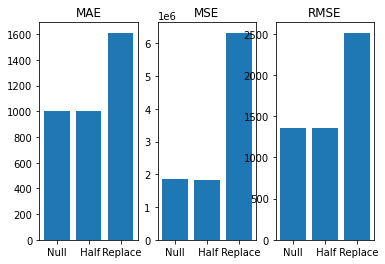

<Figure size 3960x1440 with 0 Axes>

In [68]:

b = ["Null", " Half", " Replace"]
z = [lin_reg_mae1,lin_reg_mae2,lin_reg_mae3]
x= [lin_reg_mse1,lin_reg_mse2,lin_reg_mse3]
c= [np.sqrt(lin_reg_mse1), np.sqrt(lin_reg_mse2),np.sqrt(lin_reg_mse3)]

ax1 = plt.subplot(131)
graph1 = plt.bar(b,z)
plt.title("MAE")

ax2 = plt.subplot(132)
graph2 = plt.bar(b,x)
plt.title("MSE")

ax3 = plt.subplot(133)
graph2 = plt.bar(b,c)
plt.title("RMSE")
plt.figure(figsize = (55,20))
plt.tight_layout()
plt.show()

**At each Training case**, 
 - Just drop the null data, shows minimum value.
 - Also, replace only 5 null Sales data also shows similar output.
 - But, replace about 171 data on "Sales" shows even poor output data.

In [69]:
x11 = X1_test[:,0].reshape(-1, 1)
x22 = X2_test[:,0].reshape(-1, 1)
x33 = X3_test[:,0].reshape(-1, 1)

y1_pred_test = lin_reg1.predict(x11)
lin_reg_mse1 = mean_squared_error(y1_test.values.reshape(-1,1), y1_pred_test)
lin_reg_mae1 = mean_absolute_error(y1_test.values.reshape(-1,1), y1_pred_test)

y2_pred_test = lin_reg2.predict(x22)
lin_reg_mse2 = mean_squared_error(y2_test.values.reshape(-1,1), y2_pred_test)
lin_reg_mae2 = mean_absolute_error(y2_test.values.reshape(-1,1), y2_pred_test)

y3_pred_test = lin_reg3.predict(x33)
lin_reg_mse3 = mean_squared_error(y3_test.values.reshape(-1,1), y3_pred_test)
lin_reg_mae3 = mean_absolute_error(y3_test.values.reshape(-1,1), y3_pred_test)

print("Data_1st's output : ")
print(f'MAE: {lin_reg_mae1:.4f}, MSE: {lin_reg_mse1:.4f}, RMSE: {np.sqrt(lin_reg_mse1):.4f}')
print("Data_2nd's output : ")
print(f'MAE: {lin_reg_mae2:.4f}, MSE: {lin_reg_mse2:.4f}, RMSE: {np.sqrt(lin_reg_mse2):.4f}')
print("Data_3rd's output : ")
print(f'MAE: {lin_reg_mae3:.4f}, MSE: {lin_reg_mse3:.4f}, RMSE: {np.sqrt(lin_reg_mse3):.4f}')

Data_1st's output : 
MAE: 992.6283, MSE: 1761656.6099, RMSE: 1327.2741
Data_2nd's output : 
MAE: 997.2559, MSE: 1799331.7486, RMSE: 1341.3917
Data_3rd's output : 
MAE: 1610.4178, MSE: 6310866.3235, RMSE: 2512.1438


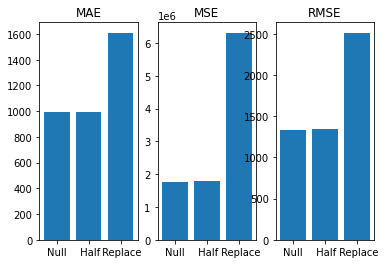

<Figure size 3960x1440 with 0 Axes>

In [70]:

b = ["Null", " Half", " Replace"]
z = [lin_reg_mae1,lin_reg_mae2,lin_reg_mae3]
x= [lin_reg_mse1,lin_reg_mse2,lin_reg_mse3]
c= [np.sqrt(lin_reg_mse1), np.sqrt(lin_reg_mse2),np.sqrt(lin_reg_mse3)]

ax1 = plt.subplot(131)
graph1 = plt.bar(b,z)
plt.title("MAE")

ax2 = plt.subplot(132)
graph2 = plt.bar(b,x)
plt.title("MSE")

ax3 = plt.subplot(133)
graph2 = plt.bar(b,c)
plt.title("RMSE")
plt.figure(figsize = (55,20))
plt.tight_layout()
plt.show()

**At each Testing case**, 
 - Just drop the null data, shows minimum value.
 - Also, replace only 5 null Sales data also shows similar output.
 - But, replace about 171 data on "Sales" shows even poor output data.
 
So, It shows same performance on Training and Testing.

But, even better output than Training. 

**Step i-2) Multiple linear regression**

In [71]:

# for data_1st

lin_reg1 = LinearRegression()
lin_reg1.fit(X1_train, y11)
lin_reg1.score(X1_train, y11)
y1_pred_train = lin_reg1.predict(X1_train)
lin_reg_mse1 = mean_squared_error(y11, y1_pred_train)
lin_reg_mae1 = mean_absolute_error(y11, y1_pred_train)
print("Data_1st's output : ")
print(f'MAE: {lin_reg_mae1:.4f}, MSE: {lin_reg_mse1:.4f}, RMSE: {np.sqrt(lin_reg_mse1):.4f}')
print()


lin_reg2 = LinearRegression()
lin_reg2.fit(X2_train, y22)
lin_reg2.score(X2_train, y22)
y2_pred_train = lin_reg2.predict(X2_train)
lin_reg_mse2 = mean_squared_error(y22, y2_pred_train)
lin_reg_mae2 = mean_absolute_error(y22, y2_pred_train)
print("Data_2nd's output : ")
print(f'MAE: {lin_reg_mae2:.4f}, MSE: {lin_reg_mse2:.4f}, RMSE: {np.sqrt(lin_reg_mse2):.4f}')
print()

lin_reg3 = LinearRegression()
lin_reg3.fit(X3_train, y33)
lin_reg3.score(X3_train, y33)
y3_pred_train = lin_reg3.predict(X3_train)
lin_reg_mse3 = mean_squared_error(y33, y3_pred_train)
lin_reg_mae3 = mean_absolute_error(y33, y3_pred_train)
print("Data_3rd's output : ")
print(f'MAE: {lin_reg_mae3:.4f}, MSE: {lin_reg_mse3:.4f}, RMSE: {np.sqrt(lin_reg_mse3):.4f}')
print()

Data_1st's output : 
MAE: 507.7922, MSE: 527659.1389, RMSE: 726.4015

Data_2nd's output : 
MAE: 507.6147, MSE: 525808.1519, RMSE: 725.1263

Data_3rd's output : 
MAE: 940.7919, MSE: 1757502.8995, RMSE: 1325.7085



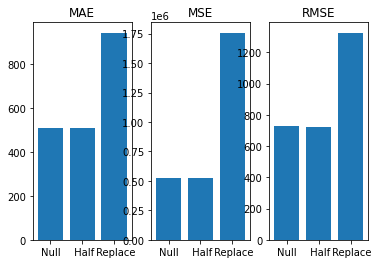

<Figure size 3960x1440 with 0 Axes>

In [72]:

b = ["Null", " Half", " Replace"]
z = [lin_reg_mae1,lin_reg_mae2,lin_reg_mae3]
x= [lin_reg_mse1,lin_reg_mse2,lin_reg_mse3]
c= [np.sqrt(lin_reg_mse1), np.sqrt(lin_reg_mse2),np.sqrt(lin_reg_mse3)]

ax1 = plt.subplot(131)
graph1 = plt.bar(b,z)
plt.title("MAE")

ax2 = plt.subplot(132)
graph2 = plt.bar(b,x)
plt.title("MSE")

ax3 = plt.subplot(133)
graph2 = plt.bar(b,c)
plt.title("RMSE")
plt.figure(figsize = (55,20))
plt.tight_layout()
plt.show()

**At each Training case**, 

Again
 - Just drop the null data, shows minimum value.
 - Also, replace only 5 null Sales data also shows similar output.
 - But, replace about 171 data on "Sales" shows even poor output data.
 - **Much smaller than just only one independent variable (Customers)**
 - about **1005 $\rightarrow$ 507**

In [73]:


y1_pred_test = lin_reg1.predict(X1_test)
lin_reg_mse1 = mean_squared_error(y1_test.values.reshape(-1,1), y1_pred_test)
lin_reg_mae1 = mean_absolute_error(y1_test.values.reshape(-1,1), y1_pred_test)

y2_pred_test = lin_reg2.predict(X2_test)
lin_reg_mse2 = mean_squared_error(y2_test.values.reshape(-1,1), y2_pred_test)
lin_reg_mae2 = mean_absolute_error(y2_test.values.reshape(-1,1), y2_pred_test)

y3_pred_test = lin_reg3.predict(X3_test)
lin_reg_mse3 = mean_squared_error(y3_test.values.reshape(-1,1), y3_pred_test)
lin_reg_mae3 = mean_absolute_error(y3_test.values.reshape(-1,1), y3_pred_test)

print("Data_1st's output : ")
print(f'MAE: {lin_reg_mae1:.4f}, MSE: {lin_reg_mse1:.4f}, RMSE: {np.sqrt(lin_reg_mse1):.4f}')
print("Data_2nd's output : ")
print(f'MAE: {lin_reg_mae2:.4f}, MSE: {lin_reg_mse2:.4f}, RMSE: {np.sqrt(lin_reg_mse2):.4f}')
print("Data_3rd's output : ")
print(f'MAE: {lin_reg_mae3:.4f}, MSE: {lin_reg_mse3:.4f}, RMSE: {np.sqrt(lin_reg_mse3):.4f}')

Data_1st's output : 
MAE: 508.0478, MSE: 504757.8078, RMSE: 710.4631
Data_2nd's output : 
MAE: 505.0397, MSE: 513353.9691, RMSE: 716.4872
Data_3rd's output : 
MAE: 948.8282, MSE: 1812971.7484, RMSE: 1346.4664


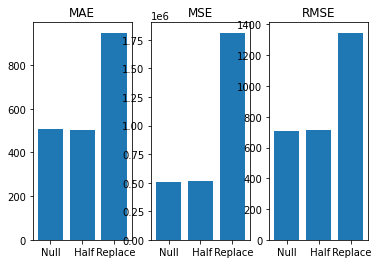

<Figure size 3960x1440 with 0 Axes>

In [74]:

b = ["Null", " Half", " Replace"]
z = [lin_reg_mae1,lin_reg_mae2,lin_reg_mae3]
x= [lin_reg_mse1,lin_reg_mse2,lin_reg_mse3]
c= [np.sqrt(lin_reg_mse1), np.sqrt(lin_reg_mse2),np.sqrt(lin_reg_mse3)]

ax1 = plt.subplot(131)
graph1 = plt.bar(b,z)
plt.title("MAE")

ax2 = plt.subplot(132)
graph2 = plt.bar(b,x)
plt.title("MSE")

ax3 = plt.subplot(133)
graph2 = plt.bar(b,c)
plt.title("RMSE")
plt.figure(figsize = (55,20))
plt.tight_layout()
plt.show()

**At each Testing case**, 
 - Just drop the null data, shows minimum value.
 - Also, replace only 5 null Sales data also shows similar output.
 - But, replace about 171 data on "Sales" shows even poor output data.
 
So, It shows same performance on Training and Testing.

But, the difference between **Train  & Test is somewhat more similiar each other**.

### Step ii) Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [76]:
# Create Decision Tree classifer object

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X1_train,y1_train)
#Predict the response for test dataset
y_pred = clf.predict(x1_train)

NameError: name 'x1_train' is not defined

### important issue (above memory error)
- if I use all of the independent variables, there has some memory issues
 - (Could not allocate 5156372480 bytes)
 
- So, I choose to delete some independent variables which cannot shows significant result.
  - Try to delete
    - **Store, DayOfWeek**
  - Try to trim
    - Date : only set December data 1, others 0. (Because only december shows some big number)
    - StateHoliday : only separate two (0 and ('a','b','c'))
  

In [ ]:
# deleting other independent variables
feature = ["Date", "Customers", "Open", "Promo", "StateHoliday"]

X1 = X1[feature]
X1["Date"] = X1["Date"]%100
for i in range(len(X1)):
    if X1.iloc[i,0] != 12:
        X1.iloc[i,0] = 0
    if X1.iloc[i,0] == 12:
        X1.iloc[i,0] = 1
        
    if X1.iloc[i,-1] == 'a':
        X1.iloc[i,-1] = 1
    if X1.iloc[i,-1] == 'b':
        X1.iloc[i,-1] = 1
    if X1.iloc[i,-1] == 'c':
        X1.iloc[i,-1] = 1    
## trim our independent data on StateHoliday & data
        
        
X2 = X2[feature]
X2["Date"] = X2["Date"]%100
for i in range(len(X2)):
    if X2.iloc[i,0] !=12:
        X2.iloc[i,0] = 0
    if X2.iloc[i,0] ==12:
        X2.iloc[i,0] = 1
    if X2.iloc[i,-1] == 'a':
        X2.iloc[i,-1] = 1
    if X2.iloc[i,-1] == 'b':
        X2.iloc[i,-1] = 1
    if X2.iloc[i,-1] == 'c':
        X2.iloc[i,-1] = 1    
        
## trim our independent data on StateHoliday & data        
X3 = X3[feature]
X3["Date"] = X3["Date"]%100
for i in range(len(X3)):
    if X3.iloc[i,0] !=12:
        X3.iloc[i,0] = 0
    if X3.iloc[i,0] ==12:
        X3.iloc[i,0] = 1
    if X3.iloc[i,-1] == 'a':
        X3.iloc[i,-1] = 1
    if X3.iloc[i,-1] == 'b':
        X3.iloc[i,-1] = 1
    if X3.iloc[i,-1] == 'c':
        X3.iloc[i,-1] = 1    
        
## trim our independent data on StateHoliday & data        

In [ ]:
#Separate data_1st
X1_train,X1_test = train_test_split( X1, test_size=0.3, random_state=0)
y1_train,y1_test = train_test_split( y1, test_size=0.3, random_state=0)

#Separate data_2nd

X2_train,X2_test = train_test_split( X2, test_size=0.3, random_state=0)
y2_train,y2_test = train_test_split( y2, test_size=0.3, random_state=0)

#Separate data_3rd
X3_train,X3_test = train_test_split( X3, test_size=0.3, random_state=0)
y3_train,y3_test = train_test_split( y3, test_size=0.3, random_state=0)

- Since, I trim our data, Separate once again.
 - At this time, Training data is too large to learn
    - So, I set large value test_size = 0.3 instead of 0.2

#### Training model

In [ ]:
# Create Decision Tree classifer object

clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(X1_train,y1_train)
y_pred1 = clf1.predict(X1_train)

clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(X2_train,y2_train)
y_pred2 = clf2.predict(X2_train)

clf3 = DecisionTreeClassifier()
clf3 = clf3.fit(X3_train,y3_train)
y_pred3 = clf3.predict(X3_train)

In [ ]:
A = range(len(y_pred1))
B = y_pred1-y1_train
ax1 = plt.subplot(131)
graph1 = plt.plot(A,  B, color='black', marker='*')
plt.title("Difference between prediction and Acutal (1st approach)", fontsize = 13, fontweight='bold')
plt.xlabel("n's data")
plt.ylabel("Prediction-Actual")
plt.yticks([-10000,-7500,-5000,-2500,0,2500,5000,7500,10000])

A = range(len(y_pred2))
B = y_pred2-y2_train
ax2 = plt.subplot(132)
graph2 =  plt.plot(A,  B, color='black', marker='*')
plt.title("Difference between prediction and Acutal (2nd approach)", fontsize = 13, fontweight='bold')
plt.xlabel("n's data")
plt.ylabel("Prediction-Actual")
plt.yticks([-10000,-7500,-5000,-2500,0,2500,5000,7500,10000])

A = range(len(y_pred3))
B = y_pred3-y3_train
ax3 = plt.subplot(133)
graph2 = plt.plot(A,  B, color='black', marker='*')
plt.title("Difference between prediction and Acutal (3rd approach)", fontsize = 13, fontweight='bold')
plt.xlabel("n's data")
plt.ylabel("Prediction-Actual")
plt.yticks([-10000,-7500,-5000,-2500,0,2500,5000,7500,10000])


plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=3.0, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

plt.show()

**This is the scatter plot, which shows the difference between actual and real value(Training model).**
 - Because, since the Sales value have 0~ 30000 values. 
   -  => Even though, we predict certain value, its standard deviation might be high.
 - It shows that
   - First one is very narrow $\rightarrow$ it have much big variance & difference.
   - Second & third is very thick $\rightarrow$ it has most appropriate model among them.
     - But Three models are very similar each other. even Outliers.
     - So, it might have no difference meaningfully.

In [ ]:
A = [accuracy_score(y1_train, y_pred1),accuracy_score(y2_train, y_pred2) ,accuracy_score(y3_train, y_pred3)]
B = ["df1", "df2", "df3"]
plt.barh(y = B, width = A, color = ["black", "blue", "green"])
plt.xlabel("Accuracy")
plt.ylabel("sample data")
plt.title("Compare the Accuracy")

In [ ]:
print("Data_1st's Accuracy:",accuracy_score(y1_train, y_pred1))
print("Data_2nd's Accuracy:",accuracy_score(y2_train, y_pred2))
print("Data_3rd's Accuracy:",accuracy_score(y3_train, y_pred3))

**At each Training case**, 
 - second case (drop null Customers & replace Sales value) shows at most highest value.
   - But, it is meaningless.
  - All of three shows 30% accuracy.
  - It's too low

In [ ]:
y_pred1 = clf1.predict(X1_test)
y_pred2 = clf1.predict(X2_test)
y_pred3 = clf1.predict(X3_test)

In [ ]:
A = range(len(y_pred1))
B = y_pred1-y1_test
ax1 = plt.subplot(131)
graph1 = plt.plot(A,  B, color='black', marker='*')
plt.title("Difference between prediction and Acutal (1st approach)", fontsize = 13, fontweight='bold')
plt.xlabel("n's data")
plt.ylabel("Prediction-Actual")
plt.yticks([-10000,-7500,-5000,-2500,0,2500,5000,7500,10000])

A = range(len(y_pred2))
B = y_pred2-y2_test
ax2 = plt.subplot(132)
graph2 =  plt.plot(A,  B, color='black', marker='*')
plt.title("Difference between prediction and Acutal (2nd approach)", fontsize = 13, fontweight='bold')
plt.xlabel("n's data")
plt.ylabel("Prediction-Actual")
plt.yticks([-10000,-7500,-5000,-2500,0,2500,5000,7500,10000])

A = range(len(y_pred3))
B = y_pred3-y3_test
ax3 = plt.subplot(133)
graph2 = plt.plot(A,  B, color='black', marker='*')
plt.title("Difference between prediction and Acutal (3rd approach)", fontsize = 13, fontweight='bold')
plt.xlabel("n's data")
plt.ylabel("Prediction-Actual")
plt.yticks([-10000,-7500,-5000,-2500,0,2500,5000,7500,10000])
plt.tight_layout()

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=3.0, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

plt.show()

**This is the scatter plot, which shows the difference between actual and real value.**
 - Because, since the Sales value have 0~ 30000 values. 
 - Even though, we predict certain value, its standard deviation might be high.
 - It shows that
   - First one is very narrow $\rightarrow$ it have much big variance & difference.
   - Second one is very thick $\rightarrow$ it has most appropriate model among them.
   - Third one is narrower $\rightarrow$ it is poor than 1st one. 
     - because, it has much outlier values than 1st one.
     - So it's bad.

In [ ]:
A = [accuracy_score(y1_test, y_pred1),accuracy_score(y2_test, y_pred2) ,accuracy_score(y3_test, y_pred3)]
B = ["df1", "df2", "df3"]
plt.barh(y = B, width = A, color = ["black", "blue", "green"])
plt.xlabel("Accuracy")
plt.ylabel("sample data")
plt.title("Compare the Accuracy")

In [ ]:
print("Data_1st's Accuracy:",accuracy_score(y1_test, y_pred1))
print("Data_2nd's Accuracy:",accuracy_score(y2_test, y_pred2))
print("Data_3rd's Accuracy:",accuracy_score(y3_test, y_pred3))

**At each Testing case**, 
 - Just drop the null data, shows minimum accuracy.
 - 2nd & 3rd data's accuracy is 0.07% point higher than 1st data.
 - So, Rather than just dropping null data, replacing value can be much better at Decision Tree.
 
So, It shows **poor performance on Testing than Training.**

I think that It also affected by **overfitting**.


### Step iii) Random Forest
 - with many trials, Random Forest also suffer from memory allocation.
 - So, it was very sorry to reduce the size such as n_estimators and max_depth.
     - So, I tried to set n = 10, max_depth = 5
     - Even, I tried to wait to check Not only Train but also Test.
     - But, Train sample has too large value. So, this is very hard to find.
       - **So, at this time, I only do the test output**.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#data_1st
rf = RandomForestClassifier(n_estimators=10, max_depth=5,random_state=0)
rf.fit(X1_train,y1_train)
predict1 = rf.predict(X1_test)

#data_2nd
rf = RandomForestClassifier(n_estimators=10, max_depth=5,random_state=0)
rf.fit(X2_train,y2_train)
predict2 = rf.predict(X2_test)

##data_3rd
rf = RandomForestClassifier(n_estimators=10, max_depth=5,random_state=0)
rf.fit(X3_train,y3_train)
predict3 = rf.predict(X3_test)

In [ ]:
A = range(len(predict1))
B = y_pred1-y1_test
ax1 = plt.subplot(131)
graph1 = plt.plot(A,  B, color='black', marker='*')
plt.title("Difference between prediction and Acutal (1st approach)", fontsize = 13, fontweight='bold')
plt.xlabel("n's data")
plt.ylabel("Prediction-Actual")
plt.yticks([-10000,-7500,-5000,-2500,0,2500,5000,7500,10000])

A = range(len(predict2))
B = y_pred2-y2_test
ax2 = plt.subplot(132)
graph2 =  plt.plot(A,  B, color='black', marker='*')
plt.title("Difference between prediction and Acutal (2nd approach)", fontsize = 13, fontweight='bold')
plt.xlabel("n's data")
plt.ylabel("Prediction-Actual")
plt.yticks([-10000,-7500,-5000,-2500,0,2500,5000,7500,10000])

A = range(len(predict3))
B = y_pred3-y3_test
ax3 = plt.subplot(133)
graph2 = plt.plot(A,  B, color='black', marker='*')
plt.title("Difference between prediction and Acutal (3rd approach)", fontsize = 13, fontweight='bold')
plt.xlabel("n's data")
plt.ylabel("Prediction-Actual")
plt.yticks([-10000,-7500,-5000,-2500,0,2500,5000,7500,10000])
plt.tight_layout()

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=3.0, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

plt.show()

 - Because I fix the yticks, the thicker the better.
 
     - First and thrid is somewhat narrow shape. (Bad)
     - Second is thick (Good) 
 - But, Thrid one has much more outlier samples than 1st. 
 - So, Thrid one is worst. Second one is best among 3 dataset.

In [ ]:
A = [accuracy_score(y1_test, predict1),accuracy_score(y2_test,predict2) ,accuracy_score(y3_test, predict3)]
B = ["df1", "df2", "df3"]
plt.barh(y = B, width = A, color = ["black", "blue", "green"])
plt.xlabel("Accuracy")
plt.ylabel("sample data")
plt.title("Compare the Accuracy")

In [ ]:
print("Data_1st's Accuracy:",accuracy_score(y1_test, predict1))
print("Data_2nd's Accuracy:",accuracy_score(y2_test, predict2))
print("Data_3rd's Accuracy:",accuracy_score(y3_test, predict3))

**At each Testing case**
 - 2nd case,  shows minimum accuracy. (drop Customers's null data and  replace Sales's null data)
 -  3rd data's accuracy is 0.03% point higher than 2nd data.
 
However, It is much lower than just decision Tree.
The reason is like below
- because of the memory issue, I have to trim a lot
- also, n_estimated and max_depth is too small

So, if I have good computer (that has much big memory allocation), I would have much more result....


## Post analysis

## Insight
 - 1) There have a definite indicator, which is "Open".
    -  Of course, it is just common thing.
    - however, through data-analyze, Its independent variable is quite important.
 - 2) There have also strong positive relationship with "#of Customers"
    - naturally, the more Customers, the higher Sales.
    - It has 0.91 corr() with Sales value.
 - 3) Also other factor, Promo have some meaningful insight, but SchoolHoliday is somewhat low.
 - 4) **Especially Date** will have some special meaning. But I couldn't find enough.
     - I only find that on December, the Sales are somewhat higher than other month.
     -  Other months have some fluctuated patterns, but I couldn't say that ones.
     - Also, on 2015 years, Its Sales value is somewhat larger.
     - Thinking about other possibility
         - certain day, (such as beginning days (1 - 5th day) or ending days (25 - 31)) have some meaning
         - certain event (that cannot be seen this data) ex) GDP or Olympics such like that.
 - 5) StateHoliday also have some points. (but I couldn't use this at Decision Tree and Random Forest because of memory)
    - among '0','a','b','c'
        - only '0' and 'a' have some Sales value.
        - Also, '0' 's Sales value is much higher than 'a' value.
 - 6) Store have no meaningful data (I think it might have some intuition...)
     - But, some certain Store have slightly larger Sales distribution.
     - However, #of Transaction at each Store is somewhat similiar.
         
**My feeling**         
First time, when I see this one, It looks simple.
But, in data-preprocessing (how to handle the null data & how to change non-ordinal data into Categorical within memory allocation), Is very hard.

So, I'm very sorry for this issue and If I have a good time to use GPU or any other good environment, I want to try this one again.



Thank you! :)

In [4]:
list_location = ["Location_left", "Location_Right_Upper", "Location_Right_Below"]

In [5]:
list_location

['Location_left', 'Location_Right_Upper', 'Location_Right_Below']

In [12]:
data

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,1,5,2015-07-31,5263.0,NaN,1,1,0,1
1,1,2,5,2015-07-31,6064.0,625.0,1,1,0,1
2,2,3,5,2015-07-31,8314.0,821.0,1,1,0,1
3,3,4,5,2015-07-31,13995.0,1498.0,1,1,0,1
4,4,5,5,2015-07-31,4822.0,559.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
53733,53733,55,2,2013-01-01,0.0,0.0,0,0,a,1
53734,53734,56,2,2013-01-01,0.0,0.0,0,0,a,1
53735,53735,57,2,2013-01-01,0.0,0.0,0,0,a,1
53736,53736,58,2,2013-01-01,0.0,0.0,0,0,a,1


In [15]:
data.loc[4,]

Unnamed: 0                4
Store                     5
DayOfWeek                 5
Date             2015-07-31
Sales                4822.0
Customers             559.0
Open                      1
Promo                     1
StateHoliday              0
SchoolHoliday             1
Name: 4, dtype: object

ajlkdfjlaksdjfklasjd;f

In [22]:
data.iloc[4,]

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,1,5,2015-07-31,5263.0,NaN,1,1,0,1
1,1,2,5,2015-07-31,6064.0,625.0,1,1,0,1
2,2,3,5,2015-07-31,8314.0,821.0,1,1,0,1
3,3,4,5,2015-07-31,13995.0,1498.0,1,1,0,1
4,4,5,5,2015-07-31,4822.0,559.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
53733,53733,55,2,2013-01-01,0.0,0.0,0,0,a,1
53734,53734,56,2,2013-01-01,0.0,0.0,0,0,a,1
53735,53735,57,2,2013-01-01,0.0,0.0,0,0,a,1
53736,53736,58,2,2013-01-01,0.0,0.0,0,0,a,1


In [26]:
data.loc[:, : ]

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,1,5,2015-07-31,5263.0,NaN,1,1,0,1
1,1,2,5,2015-07-31,6064.0,625.0,1,1,0,1
2,2,3,5,2015-07-31,8314.0,821.0,1,1,0,1
3,3,4,5,2015-07-31,13995.0,1498.0,1,1,0,1
4,4,5,5,2015-07-31,4822.0,559.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
53733,53733,55,2,2013-01-01,0.0,0.0,0,0,a,1
53734,53734,56,2,2013-01-01,0.0,0.0,0,0,a,1
53735,53735,57,2,2013-01-01,0.0,0.0,0,0,a,1
53736,53736,58,2,2013-01-01,0.0,0.0,0,0,a,1


In [27]:
data.iloc[-10:, : ]

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
53728,53728,50,2,2013-01-01,0.0,0.0,0,0,a,1
53729,53729,51,2,2013-01-01,0.0,0.0,0,0,a,1
53730,53730,52,2,2013-01-01,0.0,0.0,0,0,a,1
53731,53731,53,2,2013-01-01,0.0,0.0,0,0,a,1
53732,53732,54,2,2013-01-01,0.0,0.0,0,0,a,1
53733,53733,55,2,2013-01-01,0.0,0.0,0,0,a,1
53734,53734,56,2,2013-01-01,0.0,0.0,0,0,a,1
53735,53735,57,2,2013-01-01,0.0,0.0,0,0,a,1
53736,53736,58,2,2013-01-01,0.0,0.0,0,0,a,1
53737,53737,59,2,2013-01-01,0.0,0.0,0,0,a,1


In [32]:
data.sort_values()

TypeError: sort_values() missing 1 required positional argument: 'by'

In [33]:
x = data.iloc[:,0]

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,1,5,2015-07-31,5263.0,NaN,1,1,0,1
1,1,2,5,2015-07-31,6064.0,625.0,1,1,0,1
2,2,3,5,2015-07-31,8314.0,821.0,1,1,0,1
3,3,4,5,2015-07-31,13995.0,1498.0,1,1,0,1
4,4,5,5,2015-07-31,4822.0,559.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
53733,53733,55,2,2013-01-01,0.0,0.0,0,0,a,1
53734,53734,56,2,2013-01-01,0.0,0.0,0,0,a,1
53735,53735,57,2,2013-01-01,0.0,0.0,0,0,a,1
53736,53736,58,2,2013-01-01,0.0,0.0,0,0,a,1


In [34]:
data

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,1,5,2015-07-31,5263.0,NaN,1,1,0,1
1,1,2,5,2015-07-31,6064.0,625.0,1,1,0,1
2,2,3,5,2015-07-31,8314.0,821.0,1,1,0,1
3,3,4,5,2015-07-31,13995.0,1498.0,1,1,0,1
4,4,5,5,2015-07-31,4822.0,559.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
53733,53733,55,2,2013-01-01,0.0,0.0,0,0,a,1
53734,53734,56,2,2013-01-01,0.0,0.0,0,0,a,1
53735,53735,57,2,2013-01-01,0.0,0.0,0,0,a,1
53736,53736,58,2,2013-01-01,0.0,0.0,0,0,a,1


In [41]:
data.iloc[:,0:2]

,Unnamed: 0,Store
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5
...,...,...
53733,53733,55
53734,53734,56
53735,53735,57
53736,53736,58


In [42]:
data.iloc[:,2:4]

,DayOfWeek,Date
0,5,2015-07-31
1,5,2015-07-31
2,5,2015-07-31
3,5,2015-07-31
4,5,2015-07-31
...,...,...
53733,2,2013-01-01
53734,2,2013-01-01
53735,2,2013-01-01
53736,2,2013-01-01


In [47]:
pd.concat([data.iloc[:,2:3],data.iloc[:,3:5]],axis = 1)

,DayOfWeek,Date,Sales
0,5,2015-07-31,5263.0
1,5,2015-07-31,6064.0
2,5,2015-07-31,8314.0
3,5,2015-07-31,13995.0
4,5,2015-07-31,4822.0
...,...,...,...
53733,2,2013-01-01,0.0
53734,2,2013-01-01,0.0
53735,2,2013-01-01,0.0
53736,2,2013-01-01,0.0


In [48]:
pd.concat([])

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,1,5,2015-07-31,5263.0,NaN,1,1,0,1
1,1,2,5,2015-07-31,6064.0,625.0,1,1,0,1
2,2,3,5,2015-07-31,8314.0,821.0,1,1,0,1
3,3,4,5,2015-07-31,13995.0,1498.0,1,1,0,1
4,4,5,5,2015-07-31,4822.0,559.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
53733,53733,55,2,2013-01-01,0.0,0.0,0,0,a,1
53734,53734,56,2,2013-01-01,0.0,0.0,0,0,a,1
53735,53735,57,2,2013-01-01,0.0,0.0,0,0,a,1
53736,53736,58,2,2013-01-01,0.0,0.0,0,0,a,1


In [50]:
import scipy

In [59]:
scipy.stats.kruskal(data["Open"], data["Promo"],data["Store"], data["SchoolHoliday"] )

KruskalResult(statistic=156282.37440980008, pvalue=0.0)

In [55]:
data["Open"]

0        1
1        1
2        1
3        1
4        1
        ..
53733    0
53734    0
53735    0
53736    0
53737    0
Name: Open, Length: 53738, dtype: int64

In [ ]:
df.boxplot(column = 'head_size', by='fetus' , grid = False)

formula = 'head_size ~ C(fetus) + C(observer) + C(fetus):C(observer)'
lm = ols(formula, df).fit()
print(anova_lm(lm))

In [64]:
! pip3 install statsmodels

     |████████████████████████████████| 9.6 MB 22.1 MB/s            


In [69]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('value ~ C(Sales)', data[["Promo","Sales"]]).fit()
print(anova_lm(model))

PatsyError: Error evaluating factor: NameError: name 'value' is not defined
    value ~ C(Sales)
    ^^^^^

In [70]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv")
df.drop('person', axis= 1, inplace= True)

# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

df.info()

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,1,5,2015-07-31,5263.0,NaN,1,1,0,1
1,1,2,5,2015-07-31,6064.0,625.0,1,1,0,1
2,2,3,5,2015-07-31,8314.0,821.0,1,1,0,1
3,3,4,5,2015-07-31,13995.0,1498.0,1,1,0,1
4,4,5,5,2015-07-31,4822.0,559.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
53733,53733,55,2,2013-01-01,0.0,0.0,0,0,a,1
53734,53734,56,2,2013-01-01,0.0,0.0,0,0,a,1
53735,53735,57,2,2013-01-01,0.0,0.0,0,0,a,1
53736,53736,58,2,2013-01-01,0.0,0.0,0,0,a,1
